In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [2]:
data = pd.read_csv('Dados Experimentai - Pt C.txt',sep=';')
I = data['WE(1).Current (A)'].values
V = data['WE(1).Potential (V)'].values

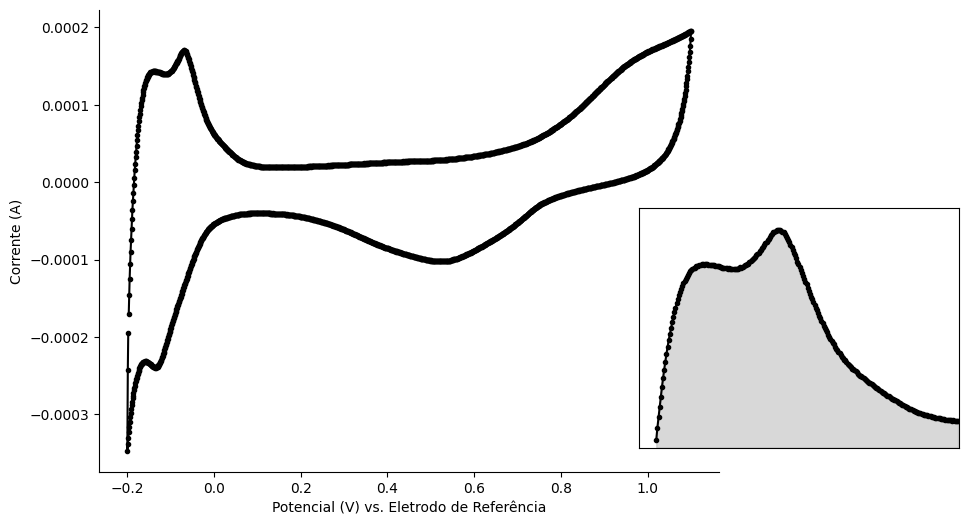

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(V, I, linestyle="-",color='black', marker="o", markersize=3, label="Voltametria Cíclica")

# Personalizar o gráfico
ax.set_xlabel("Potencial (V) vs. Eletrodo de Referência")
ax.set_ylabel("Corrente (A)")
#ax.grid(True, linestyle="--", alpha=0.7)

# Remover os eixos superior e direito
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Criar eixo para o gráfico de zoom no canto superior direito
ax_zoom = fig.add_axes([0.8, 0.15, 0.4, 0.4])  # [posição_x, posição_y, largura, altura]

# Filtrar os dados para o intervalo desejado (-0.2V a 0.1V, corrente positiva)
mask = (V >= -0.2) & (V <= 0.1) & (I > 0)
V_zoom = V[mask]
I_zoom = I[mask]

# Plotar o zoom
ax_zoom.plot(V_zoom, I_zoom, linestyle="-", marker="o", markersize=3, color="black")
ax_zoom.fill_between(V_zoom, I_zoom, alpha=0.3, color="gray")
#ax_zoom.grid(True, linestyle="--", alpha=0.5)

# Ajustar limites do zoom
ax_zoom.set_xlim(-0.2, 0.1)
ax_zoom.set_ylim(0, max(I_zoom) * 1.1)

ax_zoom.set_yticks([])
ax_zoom.set_xticks([])

plt.savefig('Cyclic.svg',dpi=300)


**Agora calcular área selecionada**

In [4]:
# Calcular a área usando a regra do trapézio
Area_graf = np.trapz(I_zoom, V_zoom)
print(f"Área sob a curva na região de zoom: {Area_graf:.6f} A·V")

Área sob a curva na região de zoom: 0.000026 A·V


**Com isso podemos calcular Area eletroativa**

In [5]:
QQ = 210e-6 #Q/cm^2
nu = 20e-3 #V/s
A_reac = Area_graf/(QQ*nu)
print(f'Assim, área eletroativa é de {A_reac} cm^2')

Assim, área eletroativa é de 6.308093229085812 cm^2
